In [4]:
import func
import numpy as np
def load_matrix(n=100): 
    raw = func.load_recipe(n)
    recipe = func.recipe_preprocessing(raw)
    data = func.split_ingredient(recipe)
    matrix = func.recipe_food_matrix(data)
    return matrix

In [5]:
matrix = load_matrix(100)
a, b, c= func.nutri_svd(method ='scipy', df = matrix, n =10)

100%|██████████| 100/100 [00:00<00:00, 408.37it/s]


Row 7: 
Row 78: (새송이)버섯


In [6]:
ab = a[:, :100].dot(np.diag(b[:100])) # 레시피에 식재료가 얼마나 중요한지지
bc = c.T[:, :100].dot(np.diag(b[:100])) # 식재료에 레시피가 얼마나 중요한지 

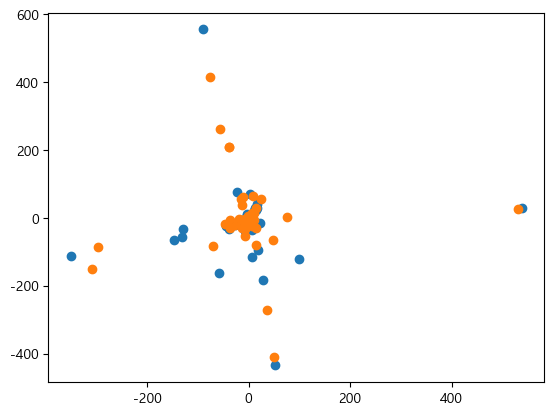

In [8]:
import matplotlib.pyplot as plt
plt.scatter(ab[:, 0], ab[:, 1])
plt.scatter(bc[:, 0], bc[:, 1])

In [42]:
def slicefood(data):
    # recipe_ingredients가 NA인 행 제거
    toy = data.loc[data["recipe_ingredients"].notna(), :]

    # 문자열 전처리
    toy["recipe_ingredients"] = toy["recipe_ingredients"].apply(lambda x: x.replace('\\ufeff', '').replace('\\u200b', ''))

    # 새로운 칼럼 생성
    for i in range(1, 21):
        toy.loc[:, f'ingredient{i}'] = None
        toy.loc[:, f'quantity{i}'] = None
        toy.loc[:, f'unit{i}'] = None

    # 패턴과 일치하지 않는 데이터를 저장할 딕셔너리
    non_matching_items = {}

    # 식재료 칼럼 쪼개기
    for idx, row in tqdm(toy.iterrows(), total=toy.shape[0]):
        ingredients_dict = ast.literal_eval(row["recipe_ingredients"])
        ingredient_count = 1
        for category, items in ingredients_dict.items():
            if items:
                for item in items:
                    match = re.match(r'([가-힣]+(\([가-힣]+\))?)([\d.+/~-]*)([가-힣a-zA-Z]+|약간|조금)?', item)
                    if match:
                        ingredient, _, quantity, unit = match.groups()

                        toy.at[idx, f'ingredient{ingredient_count}'] = ingredient
                        toy.at[idx, f'quantity{ingredient_count}'] = quantity
                        toy.at[idx, f'unit{ingredient_count}'] = unit

                        ingredient_count += 1
                    else:
                        non_matching_items[idx] = item

    # 패턴과 일치하지 않는 데이터 출력
    if non_matching_items:
        for idx, item in non_matching_items.items():
            print(f'Row {idx}: {item}')

    return toy

In [48]:
def slicefood(data):
    # recipe_ingredients가 NA인 행 제거
    toy = data.loc[data["recipe_ingredients"].notna(), :]

    # 문자열 전처리
    toy["recipe_ingredients"] = toy["recipe_ingredients"].apply(lambda x: x.replace('\\ufeff', '').replace('\\u200b', ''))

    # 새로운 칼럼 생성
    for i in range(1, 21):
        toy.loc[:, f'ingredient{i}'] = None
        toy.loc[:, f'quantity{i}'] = None
        toy.loc[:, f'unit{i}'] = None

    # 패턴과 일치하지 않는 데이터를 저장할 딕셔너리
    temp_data = []
    non_matching_items = {}

    for idx, row in tqdm(toy.iterrows(), total=toy.shape[0]):
        ingredients_dict = ast.literal_eval(row["recipe_ingredients"])
        ingredient_count = 1
        temp_row = row.to_dict()  # 현재 행의 데이터를 딕셔너리로 변환

    for category, items in ingredients_dict.items():
        if items:
            for item in items:
                match = re.match(r'([가-힣]+(\([가-힣]+\))?)([\d.+/~-]*)([가-힣a-zA-Z]+|약간|조금)?', item)
                if match:
                    ingredient, _, quantity, unit = match.groups()

                    temp_row[f'ingredient{ingredient_count}'] = ingredient
                    temp_row[f'quantity{ingredient_count}'] = quantity
                    temp_row[f'unit{ingredient_count}'] = unit

                    ingredient_count += 1
                else:
                    non_matching_items[idx] = item

        temp_data.append(temp_row)

    # 모든 데이터가 포함된 새로운 DataFrame 생성
    new_toy = pd.DataFrame(temp_data)

    # 패턴과 일치하지 않는 데이터 출력
    if non_matching_items:
        for idx, item in non_matching_items.items():
            print(f'Row {idx}: {item}')

    return new_toy

In [58]:
toy = slicefood(data)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:00<00:00, 7039.40it/s]


In [60]:
toy

,recipe_url,recipe_title,recipe_summary1,recipe_summary2,recipe_summary3,recipe_ingredients,recipe_step,recipe_tag,recipe_comment,recipe_view,...,unit17,ingredient18,quantity18,unit18,ingredient19,quantity19,unit19,ingredient20,quantity20,unit20
0,http://www.10000recipe.com/recipe/6896010,짭쪼름한 밥도둑 간장게장,2인분,15분 이내,아무나,"{'재료': ['꽃게1kg', '진간장2C', '물3C', '통마늘7톨', '생강2...","['#1 꽃게는 치솔로 구석구석 깨끗하게 씻어 줍니다.', '#2 간장 소스에 넣을...","['한식', '게장', '간장게장', '꽃게', '꽃게장', '일품요리', '밑반찬']",11,12000,...,None,None,None,None,None,None,None,None,None,None


In [37]:
from tqdm import tqdm
from embedding import slicefood

slicefood(data)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\HwijunKwon\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\HwijunKwon\AppData\Local\Temp\ipykernel_8968\2807693238.py", line 4, in <module>
    slicefood(data)
  File "c:\Users\HwijunKwon\inisw\recipe\models\embedding.py", line 34, in slicefood
NameError: name 'tqdm' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HwijunKwon\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HwijunKwon\AppData\Roaming\Python\Python311\site-packages\IPython\core\ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
           

In [26]:
from tqdm import tqdm
import ast
import re
toy = data[["recipe_title", "recipe_ingredients"]].copy()
# 문자열 전처리
toy["recipe_ingredients"] = toy["recipe_ingredients"].apply(lambda x: x.replace('\\ufeff', '').replace('\\u200b', ''))
# 새로운 칼럼 생성
for i in range(1, 21):
    toy.loc[:, f'ingredient{i}'] = None
    toy.loc[:, f'quantity{i}'] = None
    toy.loc[:, f'unit{i}'] = None
# 3. 식재료 칼럼 쪼개기
# 패턴과 일치하지 않는 데이터를 저장할 딕셔너리
non_matching_items = {}

for idx, row in tqdm(toy.iterrows(), total=toy.shape[0]): #tqdm으로 진행상황 확인
    ingredients_dict = ast.literal_eval(row["recipe_ingredients"])  # row["recipe_ingredients"] :{'재료': ['건새우50g', '물1/4컵', ...], '양념재료': ['설탕2큰술', '간장4큰술', ...}"
    ingredient_count = 1
    for category, items in ingredients_dict.items():
        if items:  # 아이템이 존재하는 경우
            for item in items:
                match = re.match(r'([가-힣]+(\([가-힣]+\))?)([\d.+/~-]*)([가-힣a-zA-Z]+|약간|조금)?', item)
                if match:
                    ingredient, _, quantity, unit = match.groups()
                    
                    toy.at[idx, f'ingredient{ingredient_count}'] = ingredient
                    toy.at[idx, f'quantity{ingredient_count}'] = quantity
                    toy.at[idx, f'unit{ingredient_count}'] = unit

                    ingredient_count += 1
                else:
                    # 패턴과 일치하지 않는 경우 딕셔너리에 추가
                    non_matching_items[idx] = item

# 패턴과 일치하지 않는 데이터 출력
for idx, item in non_matching_items.items():
    print(f'Row {idx}: {item}')


 20%|██        | 20/100 [00:00<00:00, 194.91it/s]

100%|██████████| 100/100 [00:00<00:00, 232.92it/s]

Row 24: 
Row 41: 
Row 60: 3cm두께커다란식빵1장


NameError: name 'data' is not defined

In [35]:
from embedding import convert_fraction_to_float, convert_unit_to_number
import pandas as pd

ingredient_columns = toy.filter(like='ingredient').drop(columns=['recipe_ingredients']) # 'ingredient'가 포함된 모든 열 선택
all_ingredients = [item for sublist in ingredient_columns.values for item in sublist if pd.notna(item)] # 각 행의 ingredient 값을 하나의 리스트로 결합


all_ingredients = set()
for i in range(1, 21):  
    all_ingredients.update(toy[f'ingredient{i}'].dropna().unique())

recipe_ingredients_df = pd.DataFrame(columns=list(all_ingredients))



recipe_rows = []
for idx, row in toy.iterrows():
    recipe_data = {ingredient: 0.0 for ingredient in all_ingredients}  # 모든 식재료를 None으로 초기화
    for i in range(1, 21):  
        ingredient = row[f'ingredient{i}']
        quantity = row[f'quantity{i}']
        unit = row[f'unit{i}']
        if pd.notna(ingredient) and pd.notna(quantity):
            quantity_float = convert_fraction_to_float(quantity)
            if quantity_float is not None:
                unit_number = convert_unit_to_number(unit) if pd.notna(unit) else 1
                recipe_data[ingredient] = quantity_float * unit_number
    recipe_rows.append(recipe_data)

# 새로운 데이터프레임 생성 (모든 식재료를 열로 가짐)
recipe_ingredients_df = pd.concat([pd.DataFrame([row]) for row in recipe_rows], ignore_index=True)

recipe_ingredients_df = recipe_ingredients_df.astype('float64')



In [39]:
recipe_ingredients_df.shape

(100, 392)

In [36]:
import numpy as np

a, b, c= np.linalg.svd(recipe_ingredients_df, full_matrices= True)